___
# Ciência dos Dados - PROJETO 1

## Rodrigo Gatti Coutinho
___

## Acesso a Internet (e TV)- A localização da residência e a renda da região influenciam no indice de acesso a internet?

___
## Introdução

No meu projeto eu pretendo analisar como a localização de uma residência em um estado ou em um região brasileira pode influenciar no indice de acesso a internet das pessoas. Além disso, pretendo ver se a renda das diferentes regiões do Brasil (a partir da media delas, para assim ser mais facil de visualizar)tambem influenciam no acesso a internet. 


___
## Análise e Resultados

In [133]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [134]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Familia\Documents\insper\ciencia dos dados\CD17\Projeto1


In [74]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
dados= pd.read_csv('DOM2015.csv', sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [103]:
dados= dados.loc[:, ["UF","V4621","V0201","V0202","V02322","V4105"]]

In [104]:
#tirar dados nulos e ajeitar a renda
dados.to_csv("resumo.csv") 
dados_nao_nulos= dados[pd.notnull(dados.V4621)&pd.notnull(dados.V0201)&pd.notnull(dados.UF)&pd.notnull(dados.V0202)&pd.notnull(dados.V02322)&pd.notnull(dados.V4105)]
dados_nao_nulos= dados_nao_nulos[dados.V4621!=999999999999]

C:\Users\Familia\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [105]:
#mudança das categorias
dados_nao_nulos.UF = dados.UF.astype('category')
dados_nao_nulos.UF.cat.categories= (['Rondônia', 'Acre','Amazonas', 'Roraima','Pará', 'Amapá','Tocantis', 'Maranhão','Piauí', 'Ceará','Rio Grande do Norte', 'Paraíba','Pernambuco', 'Alagoas','Sergipe', 'Bahia','Minas Gerais', 'Espírito Santo','Rio de Janeiro', 'São Paulo','Paraná', 'Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul','Mato Grosso', 'Goiás' , 'Distrito Federal'])
dados_nao_nulos.V02322 = dados.V02322.astype('category')
dados_nao_nulos.V02322.cat.categories= (['Sim', 'Não'])
dados_nao_nulos.V0201 = dados.V0201.astype('category')
dados_nao_nulos.V0201.cat.categories= (['Particular Permanente', 'Particular Improvisado', 'Coletivo'])
dados_nao_nulos.V0202 = dados.V0202.astype('category')
dados_nao_nulos.V0202.cat.categories= (['Casa', 'Apartamento', 'Comodo'])
dados_nao_nulos.V4105 = dados.V4105.astype('category')
dados_nao_nulos.V4105.cat.categories = (['URBANA - Cidade ou vila, área urbanizada','URBANA - Cidade ou vila, área não urbanizada','URBANA - Área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])

In [106]:
#criar coluna nova com as regioes
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Rondônia') | (dados_nao_nulos.UF=='Acre') | (dados_nao_nulos.UF=='Amazonas') | (dados_nao_nulos.UF=='Roraima') | (dados_nao_nulos.UF=='Pará') | (dados_nao_nulos.UF=='Amapá') | (dados_nao_nulos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Maranhão') | (dados_nao_nulos.UF=='Piaui') | (dados_nao_nulos.UF=='Caerá') | (dados_nao_nulos.UF=='Rio Grande do Norte') | (dados_nao_nulos.UF=='Paraíba') | (dados_nao_nulos.UF=='Pernambuco') | (dados_nao_nulos.UF=='Alagoas') | (dados_nao_nulos.UF=='Sergipe') | (dados_nao_nulos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Minas Gerais') | (dados_nao_nulos.UF=='Espirito Santo') | (dados_nao_nulos.UF=='Rio de Janeiro') | (dados_nao_nulos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Paraná') | (dados_nao_nulos.UF=='Santa Catarina') | (dados_nao_nulos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Mato Grosso do Sul') | (dados_nao_nulos.UF=='Mato Grosso') | (dados_nao_nulos.UF=='Goiás') | (dados_nao_nulos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'

In [107]:
#nova tabela filtrada, que so mostra os dados que mais aparecem
dadosfiltrados= dados_nao_nulos[(dados_nao_nulos.V0201== 'Particular Permanente')|(dados_nao_nulos.V0201== 'Particular Improvisado') & (dados_nao_nulos.V0202== 'Casa') | (dados_nao_nulos.V0202=='Apartamento')]

In [108]:
#tabela dos dados so da regiao Norte
tabelanorte= dadosfiltrados[dadosfiltrados.Regiao=='Norte']

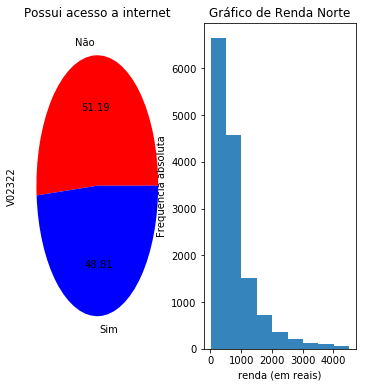

In [109]:
#grafico de porcentagem de sim e nao; grafico da renda da regiao
plt.subplot(121)
tabelanorte1= tabelanorte.V02322.value_counts()
tabelanorte1.plot(kind='pie', colors=('red','blue'), autopct="%0.2f",legend=False)
plt.title("Possui acesso a internet")
plt.subplot(122)
faixa = range(10,5000,500)
renda_Nordeste = pd.cut(tabelanorte.V4621, bins=faixa)
renda_Nordeste.value_counts(sort=False, normalize=True)*100
plot = tabelanorte.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Norte', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [110]:
#tabela dos dados so da regiao Nordeste
tabelanordeste= dadosfiltrados[dadosfiltrados.Regiao=='Nordeste']

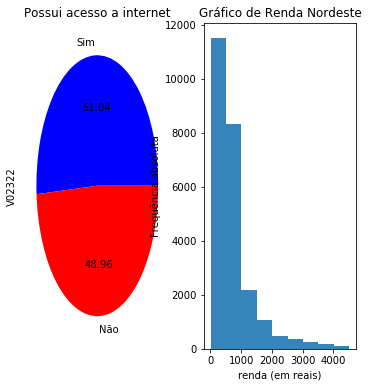

In [111]:
#grafico de porcentagem de sim e nao; grafico da renda da regiao
plt.subplot(121)
tabelanordeste1= tabelanordeste.V02322.value_counts()
tabelanordeste1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.title("Possui acesso a internet")
plt.subplot(122)
faixa = range(10,5000,500)
renda_Nordeste = pd.cut(tabelanordeste.V4621, bins=faixa)
renda_Nordeste.value_counts(sort=False, normalize=True)*100
plot = tabelanordeste.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Nordeste', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')


In [112]:
#tabela dos dados so da regiao Sudeste
tabelasudeste= dadosfiltrados[dadosfiltrados.Regiao=='Sudeste']

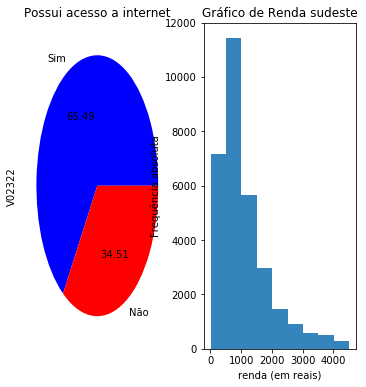

In [113]:
#grafico de porcentagem de sim e nao; grafico da renda da regiao
plt.subplot(121)
tabelasudeste1= tabelasudeste.V02322.value_counts()
tabelasudeste1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.title("Possui acesso a internet")
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sudeste = pd.cut(tabelasudeste.V4621, bins=faixa)
renda_Sudeste.value_counts(sort=False, normalize=True)*100
plot = tabelasudeste.V4621.plot.hist(bins=faixa,title='Gráfico de Renda sudeste', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [114]:
#tabela dos dados so da regiao Sul
tabelasul= dadosfiltrados[dadosfiltrados.Regiao=='Sul']

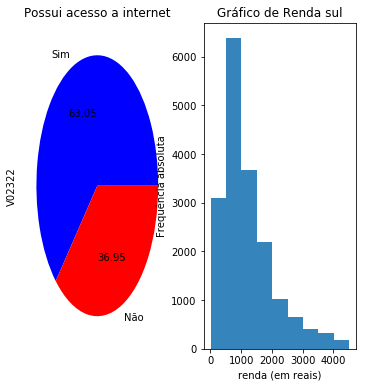

In [115]:
#grafico de porcentagem de sim e nao; grafico da renda da regiao
plt.subplot(121)
tabelasul1= tabelasul.V02322.value_counts()
tabelasul1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.title("Possui acesso a internet")
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sul = pd.cut(tabelasul.V4621, bins=faixa)
renda_Sul.value_counts(sort=False, normalize=True)*100
plot = tabelasul.V4621.plot.hist(bins=faixa,title='Gráfico de Renda sul', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [116]:
#tabela dos dados so da regiao Centroeste
tabelacentroeste= dadosfiltrados[dadosfiltrados.Regiao=='Centroeste']

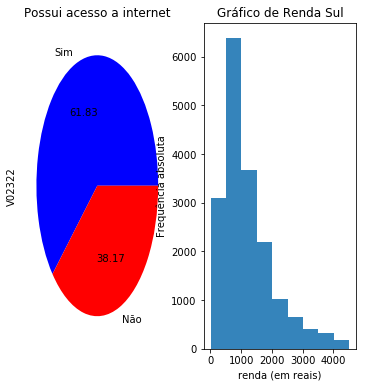

In [117]:
#grafico de porcentagem de sim e nao; grafico da renda da regiao
plt.subplot(121)
tabelacentroeste1= tabelacentroeste.V02322.value_counts()
tabelacentroeste1.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)
plt.title("Possui acesso a internet")
plt.subplot(122)
faixa = range(10,5000,500)
renda_Sul = pd.cut(tabelasul.V4621, bins=faixa)
renda_Sul.value_counts(sort=False, normalize=True)*100
plot = tabelasul.V4621.plot.hist(bins=faixa,title='Gráfico de Renda Sul', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [118]:
#media das rendas de cada regiao

In [119]:
medianorte= tabelanorte['V4621'].mean()
medianorte

888.1283733005397

In [120]:
medianordeste= tabelanordeste['V4621'].mean()
medianordeste

869.1184410798686

In [121]:
mediasudeste= tabelasudeste['V4621'].mean()
mediasudeste

1504.1914171414717

In [122]:
mediasul= tabelasul['V4621'].mean()
mediasul

1576.3465903120732

In [123]:
mediacentroeste= tabelacentroeste['V4621'].mean()
mediacentroeste

1583.91730115017

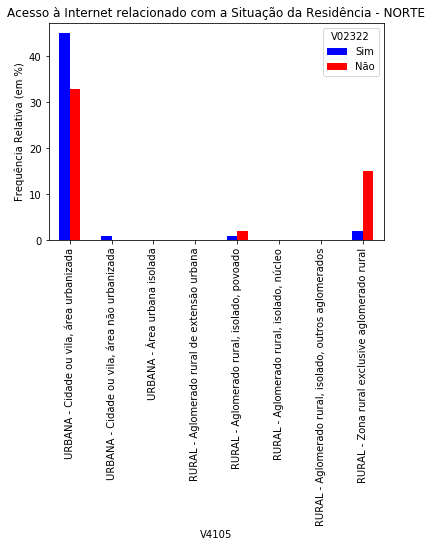

In [124]:
ct_in_Norte = pd.crosstab(tabelanorte.V4105, tabelanorte.V02322)
ct_in_Norte = (ct_in_Norte/ct_in_Norte.sum().sum()*100).round(decimals=0)
ct_in_Norte.plot(kind='bar', color=('blue', 'red'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - NORTE")
plt.ylabel('Frequência Relativa (em %)')

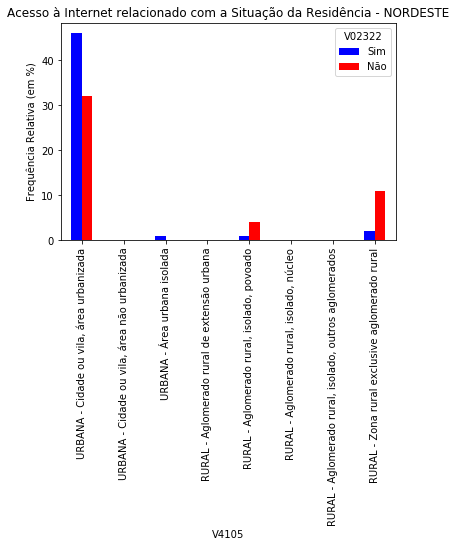

In [125]:
ct_in_Nordeste = pd.crosstab(tabelanordeste.V4105, tabelanordeste.V02322)
ct_in_Nordeste = (ct_in_Nordeste/ct_in_Nordeste.sum().sum()*100).round(decimals=0)
ct_in_Nordeste.plot(kind='bar', color=('blue', 'red'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - NORDESTE")
plt.ylabel('Frequência Relativa (em %)')

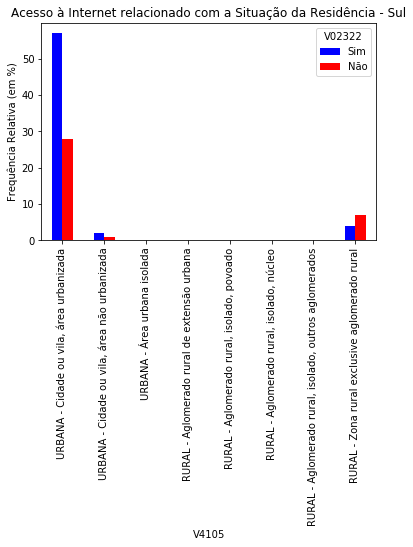

In [126]:
ct_in_Sul = pd.crosstab(tabelasul.V4105, tabelasul.V02322)
ct_in_Sul = (ct_in_Sul/ct_in_Sul.sum().sum()*100).round(decimals=0)
ct_in_Sul.plot(kind='bar', color=('blue', 'red'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - Sul")
plt.ylabel('Frequência Relativa (em %)')

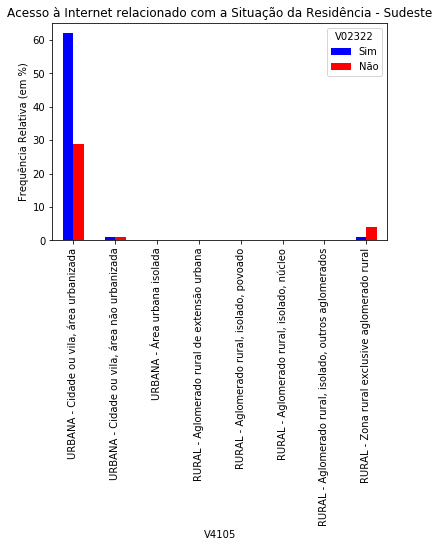

In [127]:
ct_in_Sudeste = pd.crosstab(tabelasudeste.V4105, tabelasudeste.V02322)
ct_in_Sudeste = (ct_in_Sudeste/ct_in_Sudeste.sum().sum()*100).round(decimals=0)
ct_in_Sudeste.plot(kind='bar', color=('blue', 'red'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - Sudeste")
plt.ylabel('Frequência Relativa (em %)')

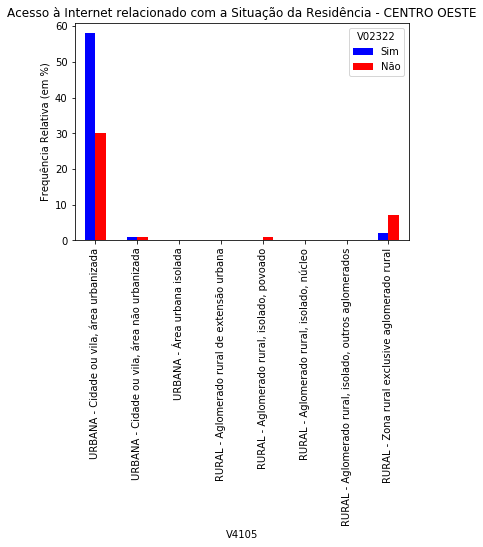

In [128]:
ct_in_centroeste = pd.crosstab(tabelacentroeste.V4105, tabelacentroeste.V02322)
ct_in_centroeste = (ct_in_centroeste/ct_in_centroeste.sum().sum()*100).round(decimals=0)
ct_in_centroeste.plot(kind='bar', color=('blue', 'red'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - CENTRO OESTE")
plt.ylabel('Frequência Relativa (em %)')

In [129]:
#criar nova coluna na tabela com a media das rendas de cada regiao
dadosfiltrados.loc[(dadosfiltrados.Regiao=='Norte'), 'media_renda']= '888.1283733005397'
dadosfiltrados.loc[(dadosfiltrados.Regiao=='Nordeste'), 'media_renda']= '869.1184410798686'
dadosfiltrados.loc[(dadosfiltrados.Regiao=='Sudeste'), 'media_renda']= '1504.1914171414717'
dadosfiltrados.loc[(dadosfiltrados.Regiao=='Sul'), 'media_renda']= '1576.3465903120732'
dadosfiltrados.loc[(dadosfiltrados.Regiao=='Centroeste'), 'media_renda']= '1583.91730115017'
dadosfiltrados.head()

,UF,V4621,V0201,V0202,V02322,V4105,Regiao,media_renda
0,Rondônia,800.0,Particular Permanente,Apartamento,Não,"URBANA - Cidade ou vila, área urbanizada",Norte,888.1283733005397
2,Rondônia,1150.0,Particular Permanente,Apartamento,Sim,"URBANA - Cidade ou vila, área urbanizada",Norte,888.1283733005397
3,Rondônia,793.0,Particular Permanente,Casa,Sim,"URBANA - Cidade ou vila, área urbanizada",Norte,888.1283733005397
4,Rondônia,2900.0,Particular Permanente,Casa,Não,"URBANA - Cidade ou vila, área urbanizada",Norte,888.1283733005397
5,Rondônia,1990.0,Particular Permanente,Casa,Sim,"URBANA - Cidade ou vila, área urbanizada",Norte,888.1283733005397


In [135]:
#grafico comparando as medias de cada regiao
ct_in_dadosfiltrados = pd.crosstab(dadosfiltrados.Regiao,dadosfiltrados.media_renda)
ct_in_dadosfiltrados = (ct_in_centroeste/ct_in_centroeste.sum().sum()*100).round(decimals=0)
ct_in_dadosfiltrados.plot(kind='bar', color=('blue')
plt.title ("Comparação das rendas das regiões")
plt.ylabel('Frequência Relativa (em %)')

SyntaxError: invalid syntax (<ipython-input-135-88885811def0>, line 5)

___
## Conclusão 

Descreva aqui suas conclusões!